In [3]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [4]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/ERA5/era5_yearly.nc')
 

data=data.squeeze()


data


<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-16T12:00:00 ... 2020-12-16T12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    tp       (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Jul 13 15:33:26 2022: cdo -L fldmean -ymonavg -remapnn,...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [5]:
x = data['tp']
x = x*1000*24


#data=data.to_array()


#plt.plot(x,data)

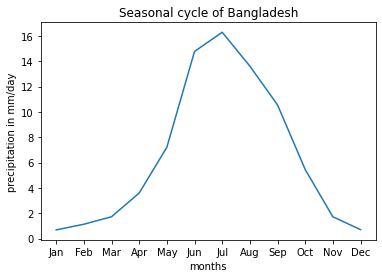

In [6]:
mon=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#mon=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N','D']

mon

plt.title('Seasonal cycle of Bangladesh')
plt.xlabel('months')
plt.ylabel('precipitation in mm/day')
plt.plot(mon,x)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/month-vs-pr-era5.png")



In [7]:
miroc5_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MIROC5/miroc5_yearly.nc')

miroc5_data = miroc5_data.squeeze()

miroc5_data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) object 2005-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pr       (time) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Sat Jul 16 11:48:15 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [8]:
x2 = miroc5_data['pr']
x2 = x2*86400

In [9]:
gcm_miroc5_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MIROC5/miroc5_yearly.nc')

gcm_miroc5_data = gcm_miroc5_data.squeeze()

gcm_miroc5_data


<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) object 2012-01-16 12:00:00 ... 2012-12-16 12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pr       (time) float32 ...
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.4
    history:                Sat Jul 16 11:54:49 2022: cdo -L fldmean -ymonavg...
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    ...                     ...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [10]:
x3 = gcm_miroc5_data['pr']
x3 = x3*86400


In [11]:

#RegCM ensemble average

#ea_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/ensemble-average/regcm_ensmean_pr_197001-200512_yearly.nc')


ea_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/ensemble-average/regcmensble_yearly.nc')

ea_data = ea_data.squeeze()

ea_data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) object 2005-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pr       (time) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Aug 15 13:07:36 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [12]:
x4 = ea_data['pr']
x4 = x4*86400

In [13]:
#GCM ensemble average


gcm_ea_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/ensemble-average/gcmensemble_yearly.nc')

gcm_ea_data = gcm_ea_data.squeeze()

gcm_ea_data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) object 2005-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pr       (time) float32 ...
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.4
    history:                Fri Jul 22 11:03:45 2022: cdo -L fldmean -ymonavg...
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    ...                     ...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [14]:
x5 = gcm_ea_data ['pr']
x5 = x5*86400

NameError: name 'x1' is not defined

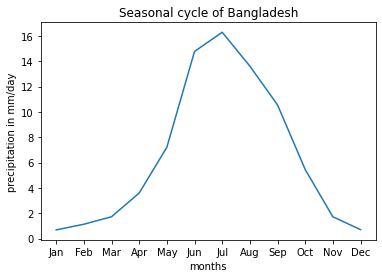

In [15]:
mon=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#mon=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N','D']

mon

plt.title('Seasonal cycle of Bangladesh')
plt.xlabel('months')
plt.ylabel('precipitation in mm/day')
plt.plot(mon,x,label='Reanalysis(Era5)')
plt.plot(mon,x1,label='Observation(Chirps)')
plt.plot(mon,x2,label='RegCM(Miroc5)')
plt.plot(mon,x3,label='GCM(Miroc5)')



plt.legend(loc='best')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/month-vs-precipitation.png")


In [ ]:
mon=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#mon=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N','D']

mon

plt.title('Seasonal cycle of Bangladesh')
plt.xlabel('months')
plt.ylabel('precipitation in mm/day')
plt.plot(mon,x,label='Reanalysis(Era5)')
plt.plot(mon,x1,label='Observation(Chirps)')
#plt.plot(mon,x2,label='RegCM(Miroc5)')
#plt.plot(mon,x3,label='GCM(Miroc5)')
plt.plot(mon,x5,label='GCM(ensemble avg)')

plt.plot(mon,x4,label='RegCM(ensemble avg)')



plt.legend(loc='best')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

#plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/month-vs-EA_precipitation.png")


#################################################################################

Now I will plot the graph of 3 observations vs Era-int and Regcm(Era-int)

In [16]:
eraint_data1 = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/Eraintrim/pr_197901-201812_yearly.nc')
 

eraint_data1=eraint_data1.squeeze()


eraint_data1

 



<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T06:00:00 ... 2018-12-01T06:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    tp       (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Jul 27 14:32:43 2022: cdo -L fldmean -ymonavg -remapnn,...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [17]:
xrea = eraint_data1['tp']
xrea = xrea*24000
xrea

<xarray.DataArray 'tp' (time: 12)>
array([ 0.4790318 ,  0.893629  ,  1.398417  ,  3.102729  ,  6.6541696 ,
       12.973898  , 14.259966  , 12.397324  ,  9.801949  ,  4.8973966 ,
        1.5322242 ,  0.57341933], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T06:00:00 ... 2018-12-01T06:00:00
    lon      float64 0.0
    lat      float64 0.0

In [18]:
#RegCM Era-int

eraint_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_was-22-ecmwf_197901-201711_yearly.nc')

eraint_data = eraint_data.squeeze()

eraint_data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-16T12:00:00 ... 2016-12-16T12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pr       (time) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Fri Jul 22 23:50:34 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [19]:
xera = eraint_data['pr']

xera = xera*86400

In [20]:
chirps_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps_yearcicle.nc')

chirps_data = chirps_data.squeeze()

chirps_data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2021-12-01
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    precip   (time) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Mon Jul 11 11:59:05 2022: cdo -L fldmean -ymonavg -rem...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [21]:
x1 = chirps_data['precip']
x1 = x1/30.4167

In [22]:
cru_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/cru/cru_ts4.06.1901.2021.pre.dat_yearly.nc')

cru_data = cru_data.squeeze()

cru_data



<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-16 2021-02-15 ... 2021-12-16
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pre      (time) float32 ...
    stn      (time) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.4
    history:      Fri Jul 22 23:56:44 2022: cdo -L fldmean -ymonavg -remapnn,...
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.06 Precipitation
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [23]:
xcru = cru_data['pre']
xcru = xcru/30.4167


In [24]:

trm_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008_yearly.nc')

trm_data = trm_data.squeeze()

trm_data



<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2008-12-01
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.9rc1 (https...
    history:                   Fri Jul 22 23:58:08 2022: cdo -L fldmean -ymon...
    Conventions:               None
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.9.9rc1 (https...

In [25]:
xtrm = trm_data['precip']
xtrm = xtrm*24


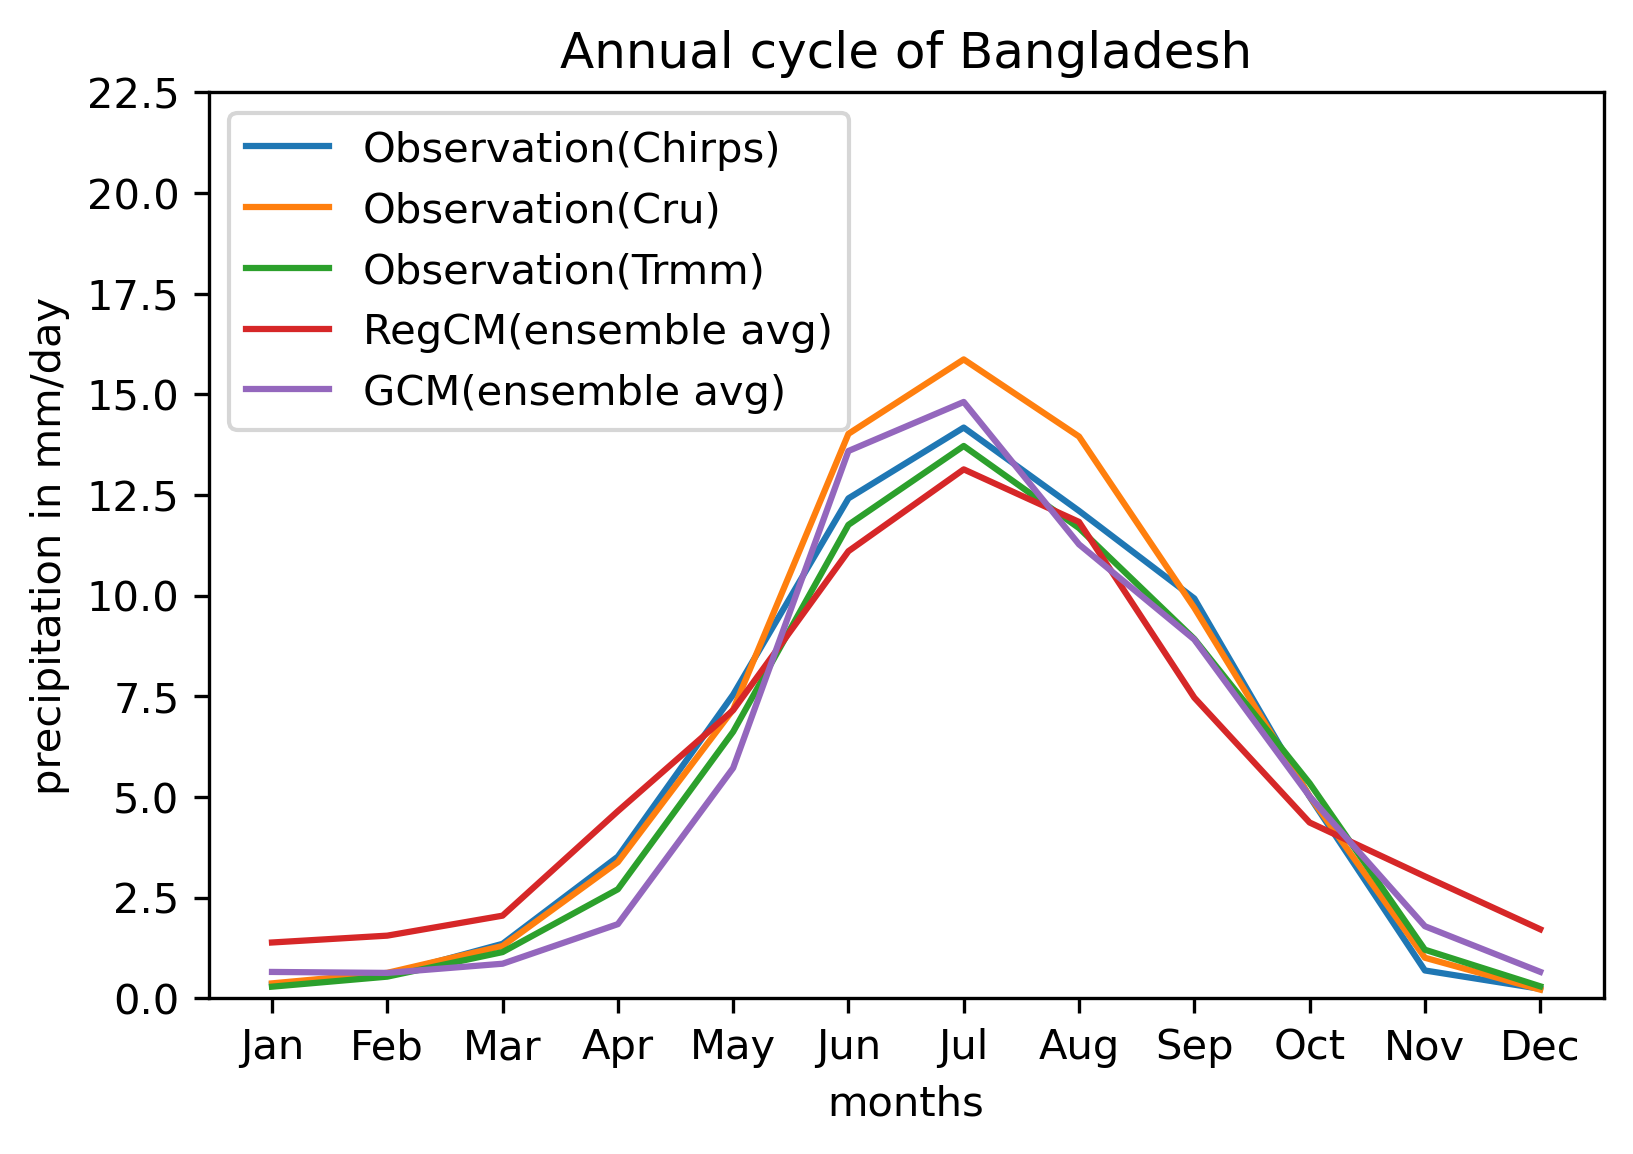

In [25]:
mon=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#mon=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N','D']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.title('Annual cycle of Bangladesh')
plt.xlabel('months')
plt.ylabel('precipitation in mm/day')
#plt.plot(mon,xera,label='RegCM(Era-int)')
#plt.plot(mon,xrea,label='Era-int')


plt.plot(mon,x1,label='Observation(Chirps)')
plt.plot(mon,xcru,label='Observation(Cru)')
plt.plot(mon,xtrm,label='Observation(Trmm)')

plt.ylim(0,20+2.5,2.5)


plt.plot(mon,x4,label='RegCM(ensemble avg)')
plt.plot(mon,x5,label='GCM(ensemble avg)')

plt.legend(loc='best')



plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/month-vs-precipitation(Ensemble avg vs obs).png")
